# prompt1:

1.   write python to solve classification problem
2.   產生300個0到1000之間的隨機數列x
3.   分成兩類,當500<=x<=800時y=1,其餘y=0
4.   分別使用 Logistic regression predict y1,SVM predict y2
5.   分別繪製y1與y2的結果

Logistic Regression Accuracy: 0.53
SVM (RBF Kernel) Accuracy: 0.98


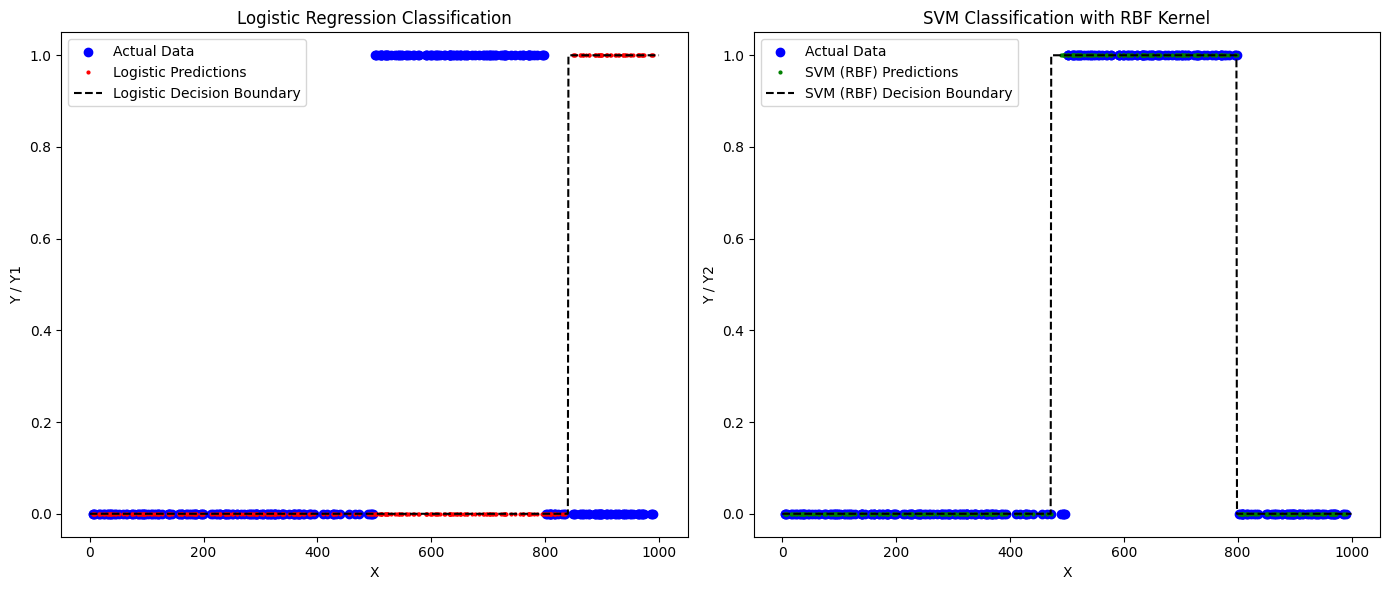

In [1]:
# CRISP-DM Steps Implementation for Logistic Regression and SVM (RBF Kernel)

# Step 1: Business Understanding
# Goal: Classify binary outcomes using logistic regression and SVM on 300 random variables to analyze classification performance and decision boundaries.

# Step 2: Data Understanding
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 3: Data Preparation
# Set seed for reproducibility
np.random.seed(42)

# Generate 300 random variables (X) in the range of 0 to 1000
X = np.random.uniform(0, 1000, 300).reshape(-1, 1)
# Define binary outcomes (Y) based on condition: Y(i) = 1 if 500 < X(i) < 800, otherwise Y(i) = 0
Y = np.where((X > 500) & (X < 800), 1, 0).ravel()

# Step 4: Modeling

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X, Y)
Y1 = logistic_model.predict(X)  # Logistic regression predictions

# SVM Model with RBF Kernel for Non-linear Classification
svm_rbf_model = SVC(kernel='rbf')
svm_rbf_model.fit(X, Y)
Y2_rbf = svm_rbf_model.predict(X)  # SVM (RBF kernel) predictions

# Compute decision boundaries for visualization
x_range = np.linspace(0, 1000, 1000).reshape(-1, 1)
logistic_boundary = logistic_model.predict_proba(x_range)[:, 1] >= 0.5
svm_rbf_boundary = svm_rbf_model.decision_function(x_range)

# Step 5: Evaluation
# Evaluate model accuracy on the training data
logistic_accuracy = accuracy_score(Y, Y1)
svm_rbf_accuracy = accuracy_score(Y, Y2_rbf)

print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print(f"SVM (RBF Kernel) Accuracy: {svm_rbf_accuracy:.2f}")

# Step 6: Deployment (Visualization of Results)
plt.figure(figsize=(14, 6))

# Plot for Logistic Regression
plt.subplot(1, 2, 1)
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y1, 'ro', label='Logistic Predictions', markersize=2)
plt.plot(x_range, logistic_boundary, 'k--', label='Logistic Decision Boundary')
plt.title("Logistic Regression Classification")
plt.xlabel("X")
plt.ylabel("Y / Y1")
plt.legend()

# Plot for SVM with RBF Kernel
plt.subplot(1, 2, 2)
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y2_rbf, 'go', label='SVM (RBF) Predictions', markersize=2)
plt.plot(x_range, (svm_rbf_boundary >= 0).astype(int), 'k--', label='SVM (RBF) Decision Boundary')
plt.title("SVM Classification with RBF Kernel")
plt.xlabel("X")
plt.ylabel("Y / Y2")
plt.legend()

plt.tight_layout()
plt.show()



In [29]:
!streamlit run hw3.2.py



^C


In [31]:
!streamlit run hw3.3.py

^C
